# 获取前n个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

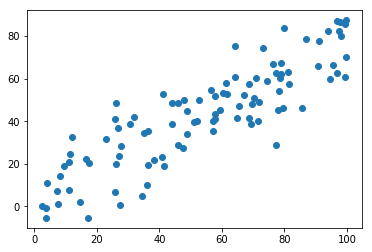

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)
X = demean(X)

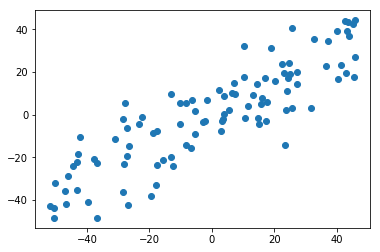

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [7]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_inters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    curr_inter = 0
    while curr_inter < n_inters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意：每次求一个单位向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        curr_inter += 1
    return w

In [8]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.78154483, 0.62384909])

In [17]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#     X2[i] = X[i] -  X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w

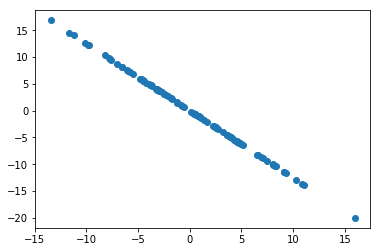

In [18]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [19]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.6238524 , -0.78154218])

In [20]:
w.dot(w2)

4.238276905987881e-06

In [13]:
w

array([0.78154483, 0.62384909])

In [21]:
def first_n_components(n, X, eta=0.01, n_inters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
    return res

In [22]:
first_n_components(2, X)

[array([0.78154473, 0.6238492 ]), array([-0.62384692,  0.78154655])]